In [ ]:
# This script employs various metrics including 
# correlation, $R^{2}$, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), 
# to quantitatively measure the models' predictive capabilities.
# It compares the empirical data vs the predictions of each model.
# A random model is introduced as benchmark.

# Author:
# Alejandra Lopez Sosa June 2023, Zurich University of Applied Sciences,
# Institute for Chemistry and Biotechnology

# Protein expression levels measurements (empirical data)
# These data were generated by Marco Gees, Zrinka Raguz Nakic and Christin Peters 
# from the Institute of Biotechnology, ZHAW Wädenswil, during the years 2020-2022. 
# They are stored under the name Testing_the_TEH/data/data_gfp_zrinka.csv

### Preparations

In [571]:
# Programming language: R
# read file data_zfp_zrinka.csv
data_gfp_zrinka <- read.csv("/Users/ale/Documents/thesis_codon_bias/Testing_the_TEH/data/data_gfp_zrinka.csv", header = TRUE, sep = ",")

In [572]:
names(data_gfp_zrinka)

[1] "X...sequence_name..."    "strain..."              
[3] "time_of_measurement..h." "fluorescence.value..AU."
[5] "outlier_status..logica."

In [573]:
# keep only 'X...sequence_name...', 'strain...' and 'fluorescence.value..AU.' columns
data_gfp_zrinka <- data_gfp_zrinka[,c(1,2,4)]

In [574]:
# group by (sequence name, strain) and calculate mean fluorescence value
data_gfp_zrinka <- aggregate(data_gfp_zrinka$fluorescence.value..AU., by = list(data_gfp_zrinka$X...sequence_name., data_gfp_zrinka$strain.), FUN = mean)

In [575]:
names(data_gfp_zrinka) <- c("sequence_name", "strain", "mean_fluorescence")

In [576]:
# remove rows where sequence_name is pET28b_empty
data_gfp_zrinka <- data_gfp_zrinka[data_gfp_zrinka$sequence_name != "pET28b_empty",]

In [577]:
head(data_gfp_zrinka)

,sequence_name,strain,mean_fluorescence
,<chr>,<chr>,<dbl>
1,V015-wildtype,BL21DE3,17098.38
2,V016-AnaCoda,BL21DE3,33182.50
3,V017-GeneGA,BL21DE3,33248.62
4,V018-JCAT,BL21DE3,32378.12
5,V019-Twist (Variant 1),BL21DE3,31469.88
6,V020-Twist (Variant 2),BL21DE3,26363.50


#### Random model for comparison

In [578]:
# Random model
random_model <- data_gfp_zrinka
# generate random fluorescence values for each sequence and strain
random_model$predicted_level <- runif(nrow(data_gfp_zrinka), min = 0, max = 40000)

In [579]:
head(random_model)

,sequence_name,strain,mean_fluorescence,predicted_level
,<chr>,<chr>,<dbl>,<dbl>
1,V015-wildtype,BL21DE3,17098.38,18098.424
2,V016-AnaCoda,BL21DE3,33182.50,31456.966
3,V017-GeneGA,BL21DE3,33248.62,16364.901
4,V018-JCAT,BL21DE3,32378.12,6290.127
5,V019-Twist (Variant 1),BL21DE3,31469.88,9024.812
6,V020-Twist (Variant 2),BL21DE3,26363.50,20198.808


### Define metrics

In [580]:
correlation <- function(model, gt_col = "mean_fluorescence"){
    cor(model[,gt_col], model$predicted_level)
}

In [581]:
r_squared <- function(model, gt_col = "mean_fluorescence"){
    summary(lm(model[,gt_col] ~ model$predicted_level))$r.squared
}

In [582]:
mae <- function(model, gt_col = "mean_fluorescence"){
    mean(abs(model[,gt_col] - model$predicted_level))
}

In [583]:
rmse <- function(model, gt_col = "mean_fluorescence"){
    sqrt(mean((model[,gt_col] - model$predicted_level)^2))
}

### Compute metrics

In [584]:
# create dataframe for storing results for each model
results <- data.frame(model = character(), correlation = numeric(), r_squared = numeric(), mae = numeric(), rmse = numeric(), stringsAsFactors = FALSE)

# Random model

In [585]:
# add results on all metrics for random model as new row in results dataframe
results <- rbind(results, c("random", correlation(random_model), r_squared(random_model), mae(random_model), rmse(random_model)))

In [586]:
names(results) <- c("model", "correlation", "r_squared", "mae", "rmse")

In [587]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571


# Efficacy model

#### Efficacy averaged

In [588]:
#read the csv file containing the data
efficacy_model_avg <- read.csv("dataframes/efficacy/predicted_efficacy_averaged.csv", header = TRUE, sep = ",")
names(efficacy_model_avg)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [589]:
results <- rbind(results, c("Efficacy averaged", correlation(efficacy_model_avg), r_squared(efficacy_model_avg), mae(efficacy_model_avg), rmse(efficacy_model_avg)))

In [590]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863


#### Efficacy averaged K12 strain 

In [591]:
#read the csv file containing the data
efficacy_model_avg_k12 <- read.csv("dataframes/efficacy/predicted_efficacy_averaged_k12.csv", header = TRUE, sep = ",")
names(efficacy_model_avg_k12)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [592]:
results <- rbind(results, c("Efficacy averaged, K12 strain", correlation(efficacy_model_avg_k12), r_squared(efficacy_model_avg_k12), mae(efficacy_model_avg_k12), rmse(efficacy_model_avg_k12)))

In [593]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665


#### Efficacy averaged BL21DE3 strain

In [594]:
#read the csv file containing the data
efficacy_model_avg_bl21 <- read.csv("dataframes/efficacy/predicted_efficacy_averaged_bl21.csv", header = TRUE, sep = ",")
names(efficacy_model_avg_bl21)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [595]:
results <- rbind(results, c("Efficacy averaged, BL21DE3 strain", correlation(efficacy_model_avg_bl21), r_squared(efficacy_model_avg_bl21), mae(efficacy_model_avg_bl21), rmse(efficacy_model_avg_bl21)))

In [596]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249


#### Efficacy averaged without outliers

In [597]:
efficacy_model_avg_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers_averaged.csv", header = TRUE, sep = ",")
names(efficacy_model_avg_no_outliers)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [598]:
results <- rbind(results, c("Efficacy averaged without outliers", correlation(efficacy_model_avg_no_outliers), r_squared(efficacy_model_avg_no_outliers), mae(efficacy_model_avg_no_outliers), rmse(efficacy_model_avg_no_outliers)))

In [599]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165


#### Efficacy averaged without outliers, K12 strain

In [600]:
#read the csv file containing the data
efficacy_model_avg_k12_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers_averaged_k12.csv", header = TRUE, sep = ",")
names(efficacy_model_avg_k12_no_outliers)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [601]:
results <- rbind(results, c("Efficacy averaged without outliers, K12 strain", correlation(efficacy_model_avg_k12_no_outliers), r_squared(efficacy_model_avg_k12_no_outliers), mae(efficacy_model_avg_k12_no_outliers), rmse(efficacy_model_avg_k12_no_outliers)))

In [602]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338


#### Efficacy averaged without outliers, BL21DE3 strain

In [603]:
#read the csv file containing the data
efficacy_model_avg_bl21_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers_averaged_bl21.csv", header = TRUE, sep = ",")
names(efficacy_model_avg_bl21_no_outliers)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [604]:
results <- rbind(results, c("Efficacy averaged without outliers, BL21DE3 strain", correlation(efficacy_model_avg_bl21_no_outliers), r_squared(efficacy_model_avg_bl21_no_outliers), mae(efficacy_model_avg_bl21_no_outliers), rmse(efficacy_model_avg_bl21_no_outliers)))

In [605]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225


#### Efficacy (not averaged)

In [606]:
#read the csv file containing the data
efficacy_model <- read.csv("dataframes/efficacy/predicted_efficacy.csv", header = TRUE, sep = ",")
names(efficacy_model)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level"

In [607]:
results <- rbind(results, c("Efficacy (not averaged)", correlation(efficacy_model, "value"), r_squared(efficacy_model, "value"), mae(efficacy_model, "value"), rmse(efficacy_model, "value")))

In [608]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659


#### Efficacy (not averaged) K12 strain

In [609]:
# read the csv file containing the data
efficacy_model_k12 <- read.csv("dataframes/efficacy/predicted_efficacy_k12.csv", header = TRUE, sep = ",")
names(efficacy_model_k12)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level"

In [610]:
results <- rbind(results, c("Efficacy (not averaged), K12 strain", correlation(efficacy_model_k12, "value"), r_squared(efficacy_model_k12, "value"), mae(efficacy_model_k12, "value"), rmse(efficacy_model_k12, "value")))

In [611]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy (not averaged) BL21DE3 strain

In [612]:
# read the csv file containing the data
efficacy_model_bl21 <- read.csv("dataframes/efficacy/predicted_efficacy_bl21.csv", header = TRUE, sep = ",")
names(efficacy_model_bl21)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level"

In [613]:
results <- rbind(results, c("Efficacy (not averaged), BL21DE3 strain", correlation(efficacy_model_bl21, "value"), r_squared(efficacy_model_bl21, "value"), mae(efficacy_model_bl21, "value"), rmse(efficacy_model_bl21, "value")))

In [614]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy (not averaged) without outliers

In [615]:
#read the csv file containing the data
efficacy_model_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers.csv", header = TRUE, sep = ",")
names(efficacy_model_no_outliers)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level"

In [616]:
results <- rbind(results, c("Efficacy (not averaged) without outliers", correlation(efficacy_model_no_outliers, "value"), r_squared(efficacy_model_no_outliers, "value"), mae(efficacy_model_no_outliers, "value"), rmse(efficacy_model_no_outliers, "value")))

In [617]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy (not averaged) without outliers K12 strain

In [618]:
# read the csv file containing the data
efficacy_model_k12_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers_k12.csv", header = TRUE, sep = ",")
names(efficacy_model_k12_no_outliers)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level"

In [619]:
results <- rbind(results, c("Efficacy (not averaged) without outliers, K12 strain", correlation(efficacy_model_k12_no_outliers, "value"), r_squared(efficacy_model_k12_no_outliers, "value"), mae(efficacy_model_k12_no_outliers, "value"), rmse(efficacy_model_k12_no_outliers, "value")))

In [620]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy (not averaged) without outliers BL21DE3 strain

In [621]:
# read the csv file containing the data
efficacy_model_bl21_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers_bl21.csv", header = TRUE, sep = ",")
names(efficacy_model_bl21)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level"

In [622]:
results <- rbind(results, c("Efficacy (not averaged) without outliers, BL21DE3 strain", correlation(efficacy_model_bl21_no_outliers, "value"), r_squared(efficacy_model_bl21_no_outliers, "value"), mae(efficacy_model_bl21_no_outliers, "value"), rmse(efficacy_model_bl21_no_outliers, "value")))

In [623]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


# Accuracy model

#### Accuracy averaged

In [624]:
# read the csv file containing the data
accuracy_model_avg <- read.csv("dataframes/accuracy/accuracy_model_predictions_averaged.csv", header = TRUE, sep = ",")
names(accuracy_model_avg)

[1] "sequence_name"     "strain"            "mean_fluorescence"
[4] "predicted_level"

In [625]:
results <- rbind(results, c("Accuracy averaged", correlation(accuracy_model_avg), r_squared(accuracy_model_avg), mae(accuracy_model_avg), rmse(accuracy_model_avg)))

In [626]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy averaged, K12 strain

In [627]:
# read the csv file containing the data
accuracy_model_avg_k12 <- read.csv("dataframes/accuracy/accuracy_model_predictions_averaged_k12.csv", header = TRUE, sep = ",")
names(accuracy_model_avg_k12)

[1] "sequence_name"     "strain"            "mean_fluorescence"
[4] "predicted_level"

In [628]:
results <- rbind(results, c("Accuracy averaged, K12 strain", correlation(accuracy_model_avg_k12), r_squared(accuracy_model_avg_k12), mae(accuracy_model_avg_k12), rmse(accuracy_model_avg_k12)))

In [629]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy averaged, BL21DE3 strain

In [630]:
# read the csv file containing the data
accuracy_model_avg_bl21 <- read.csv("dataframes/accuracy/accuracy_model_predictions_averaged_bl21.csv", header = TRUE, sep = ",")
names(accuracy_model_avg_bl21)

[1] "sequence_name"     "strain"            "mean_fluorescence"
[4] "predicted_level"

In [631]:
results <- rbind(results, c("Accuracy averaged, BL21DE3 strain", correlation(accuracy_model_avg_bl21), r_squared(accuracy_model_avg_bl21), mae(accuracy_model_avg_bl21), rmse(accuracy_model_avg_bl21)))

In [632]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy averaged without outliers

In [633]:
# read the csv file containing the data
accuracy_model_avg_no_outliers <- read.csv("dataframes/accuracy/accuracy_model_predictions_averaged_no_outliers.csv", header = TRUE, sep = ",")
names(accuracy_model_avg_no_outliers)

[1] "sequence_name"     "strain"            "mean_fluorescence"
[4] "predicted_level"

In [634]:
results <- rbind(results, c("Accuracy averaged without outliers", correlation(accuracy_model_avg_no_outliers), r_squared(accuracy_model_avg_no_outliers), mae(accuracy_model_avg_no_outliers), rmse(accuracy_model_avg_no_outliers)))

In [635]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy averaged without outliers, K12 strain

In [636]:
# read the csv file containing the data
accuracy_model_avg_k12_no_outliers <- read.csv("dataframes/accuracy/accuracy_model_predictions_averaged_no_outliers_k12.csv", header = TRUE, sep = ",")
names(accuracy_model_avg_k12_no_outliers)

[1] "sequence_name"     "strain"            "mean_fluorescence"
[4] "predicted_level"

In [637]:
results <- rbind(results, c("Accuracy averaged without outliers, K12 strain", correlation(accuracy_model_avg_k12_no_outliers), r_squared(accuracy_model_avg_k12_no_outliers), mae(accuracy_model_avg_k12_no_outliers), rmse(accuracy_model_avg_k12_no_outliers)))

In [638]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy averaged without outliers, BL21DE3 strain

In [639]:
# read the csv file containing the data
accuracy_model_avg_bl21_no_outliers <- read.csv("dataframes/accuracy/accuracy_model_predictions_averaged_no_outliers_bl21.csv", header = TRUE, sep = ",")
names(accuracy_model_avg_bl21_no_outliers)

[1] "sequence_name"     "strain"            "mean_fluorescence"
[4] "predicted_level"

In [640]:
results <- rbind(results, c("Accuracy averaged without outliers, BL21DE3 strain", correlation(accuracy_model_avg_bl21_no_outliers), r_squared(accuracy_model_avg_bl21_no_outliers), mae(accuracy_model_avg_bl21_no_outliers), rmse(accuracy_model_avg_bl21_no_outliers)))

In [641]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy (not averaged)

In [642]:
# read the csv file containing the data
accuracy_model <- read.csv("dataframes/accuracy/accuracy_model_predictions.csv", header = TRUE, sep = ",")
names(accuracy_model)

[1] "sequence_name"   "strain"          "value"           "predicted_level"

In [643]:
results <- rbind(results, c("Accuracy (not averaged)", correlation(accuracy_model, "value"), r_squared(accuracy_model, "value"), mae(accuracy_model, "value"), rmse(accuracy_model, "value")))

In [644]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy (not averaged), K12 strain

In [645]:
# read the csv file containing the data
accuracy_model_k12 <- read.csv("dataframes/accuracy/accuracy_model_predictions_k12.csv", header = TRUE, sep = ",")
names(accuracy_model_k12)

[1] "sequence_name"   "strain"          "value"           "predicted_level"

In [646]:
results <- rbind(results, c("Accuracy (not averaged), K12 strain", correlation(accuracy_model_k12, "value"), r_squared(accuracy_model_k12, "value"), mae(accuracy_model_k12, "value"), rmse(accuracy_model_k12, "value")))

In [647]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy (not averaged), BL21DE3 strain

In [648]:
# read the csv file containing the data
accuracy_model_bl21 <- read.csv("dataframes/accuracy/accuracy_model_predictions_bl21.csv", header = TRUE, sep = ",")
names(accuracy_model_bl21)

[1] "sequence_name"   "strain"          "value"           "predicted_level"

In [649]:
results <- rbind(results, c("Accuracy (not averaged), BL21DE3 strain", correlation(accuracy_model_bl21, "value"), r_squared(accuracy_model_bl21, "value"), mae(accuracy_model_bl21, "value"), rmse(accuracy_model_bl21, "value")))

In [650]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy (not averaged) without outliers

In [651]:
# read the csv file containing the data
accuracy_model_no_outliers <- read.csv("dataframes/accuracy/accuracy_model_predictions_no_outliers.csv", header = TRUE, sep = ",")
names(accuracy_model_no_outliers)

[1] "sequence_name"   "strain"          "value"           "predicted_level"

In [652]:
results <- rbind(results, c("Accuracy (not averaged) without outliers", correlation(accuracy_model_no_outliers, "value"), r_squared(accuracy_model_no_outliers, "value"), mae(accuracy_model_no_outliers, "value"), rmse(accuracy_model_no_outliers, "value")))

In [653]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy (not averaged) without outliers, K12 strain

In [654]:
# read the csv file containing the data
accuracy_model_no_outliers_k12 <- read.csv("dataframes/accuracy/accuracy_model_predictions_no_outliers_k12.csv", header = TRUE, sep = ",")
names(accuracy_model_no_outliers_k12)

[1] "sequence_name"   "strain"          "value"           "predicted_level"

In [655]:
results <- rbind(results, c("Accuracy (not averaged) without outliers, K12 strain", correlation(accuracy_model_no_outliers_k12, "value"), r_squared(accuracy_model_no_outliers_k12, "value"), mae(accuracy_model_no_outliers_k12, "value"), rmse(accuracy_model_no_outliers_k12, "value")))

In [656]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Accuracy (not averaged) without outliers, BL21DE3 strain

In [657]:
# read the csv file containing the data
accuracy_model_no_outliers_bl21 <- read.csv("dataframes/accuracy/accuracy_model_predictions_no_outliers_bl21.csv", header = TRUE, sep = ",")
names(accuracy_model_no_outliers_bl21)

[1] "sequence_name"   "strain"          "value"           "predicted_level"

In [658]:
results <- rbind(results, c("Accuracy (not averaged) without outliers, BL21DE3 strain", correlation(accuracy_model_no_outliers_bl21, "value"), r_squared(accuracy_model_no_outliers_bl21, "value"), mae(accuracy_model_no_outliers_bl21, "value"), rmse(accuracy_model_no_outliers_bl21, "value")))

In [659]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


# Efficacy - Accuracy model

#### Efficacy - accuracy averaged

In [660]:
# read the csv file containing the data
effi_accu_model_avg <- read.csv("dataframes/efficacy_accuracy/data_ecoli_averaged.csv", header = TRUE, sep = ",")
names(effi_accu_model_avg)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [661]:
results <- rbind(results, c("Efficacy-Accuracy averaged", correlation(effi_accu_model_avg), r_squared(effi_accu_model_avg), mae(effi_accu_model_avg), rmse(effi_accu_model_avg)))

In [662]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy averaged, K12 strain

In [663]:
# read the csv file containing the data
effi_accu_model_avg_k12 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_averaged_K12.csv", header = TRUE, sep = ",")
names(effi_accu_model_avg_k12)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [664]:
results <- rbind(results, c("Efficacy-Accuracy averaged, K12 strain", correlation(effi_accu_model_avg_k12), r_squared(effi_accu_model_avg_k12), mae(effi_accu_model_avg_k12), rmse(effi_accu_model_avg_k12)))

In [665]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy averaged, BL21DE3 strain

In [666]:
# read the csv file containing the data
effi_accu_model_avg_bl21 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_averaged_BL21DE3.csv", header = TRUE, sep = ",")
names(effi_accu_model_avg_bl21)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [667]:
results <- rbind(results, c("Efficacy-Accuracy averaged, BL21DE3 strain", correlation(effi_accu_model_avg_bl21), r_squared(effi_accu_model_avg_bl21), mae(effi_accu_model_avg_bl21), rmse(effi_accu_model_avg_bl21)))

In [668]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy averaged without outliers

In [669]:
# read the csv file containing the data
effi_accu_model_avg_no_outliers <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers_averaged.csv", header = TRUE, sep = ",")
names(effi_accu_model_avg_no_outliers)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [670]:
results <- rbind(results, c("Efficacy-Accuracy averaged without outliers", correlation(effi_accu_model_avg_no_outliers), r_squared(effi_accu_model_avg_no_outliers), mae(effi_accu_model_avg_no_outliers), rmse(effi_accu_model_avg_no_outliers)))

In [671]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy averaged without outliers, K12 strain

In [672]:
# read the csv file containing the data
effi_accu_model_avg_no_outliers_k12 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers_averaged_K12.csv", header = TRUE, sep = ",")
names(effi_accu_model_avg_no_outliers_k12)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [673]:
results <- rbind(results, c("Efficacy-Accuracy averaged without outliers, K12 strain", correlation(effi_accu_model_avg_no_outliers_k12), r_squared(effi_accu_model_avg_no_outliers_k12), mae(effi_accu_model_avg_no_outliers_k12), rmse(effi_accu_model_avg_no_outliers_k12)))

In [674]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy averaged without outliers, BL21DE3 strain

In [675]:
# read the csv file containing the data
effi_accu_model_avg_no_outliers_bl21 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers_averaged_BL21DE3.csv", header = TRUE, sep = ",")
names(effi_accu_model_avg_no_outliers_bl21)

[1] "X"                 "sequence_name"     "strain"           
[4] "mean_fluorescence" "predicted_level"

In [676]:
results <- rbind(results, c("Efficacy-Accuracy averaged without outliers, BL21DE3 strain", correlation(effi_accu_model_avg_no_outliers_bl21), r_squared(effi_accu_model_avg_no_outliers_bl21), mae(effi_accu_model_avg_no_outliers_bl21), rmse(effi_accu_model_avg_no_outliers_bl21)))

In [677]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy (not averaged)

In [678]:
# read the csv file containing the data
effi_accu_model <- read.csv("dataframes/efficacy_accuracy/data_ecoli.csv", header = TRUE, sep = ",")
names(effi_accu_model)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"

In [679]:
results <- rbind(results, c("Efficacy-Accuracy (not averaged)", correlation(effi_accu_model, "value"), r_squared(effi_accu_model, "value"), mae(effi_accu_model, "value"), rmse(effi_accu_model, "value")))

In [680]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy (not averaged), K12 strain

In [681]:
# read the csv file containing the data
effi_accu_model_k12 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_K12.csv", header = TRUE, sep = ",")
names(effi_accu_model_k12)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"

In [682]:
results <- rbind(results, c("Efficacy-Accuracy (not averaged), K12 strain", correlation(effi_accu_model_k12, "value"), r_squared(effi_accu_model_k12, "value"), mae(effi_accu_model_k12, "value"), rmse(effi_accu_model_k12, "value")))

In [683]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy (not averaged), BL21DE3 strain

In [684]:
# read the csv file containing the data
effi_accu_model_bl21 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_BL21DE3.csv", header = TRUE, sep = ",")
names(effi_accu_model_bl21)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"

In [685]:
results <- rbind(results, c("Efficacy-Accuracy (not averaged), BL21DE3 strain", correlation(effi_accu_model_bl21, "value"), r_squared(effi_accu_model_bl21, "value"), mae(effi_accu_model_bl21, "value"), rmse(effi_accu_model_bl21, "value")))

In [686]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy (not averaged) without outliers

In [687]:
# read the csv file containing the data
effi_accu_model_no_outliers <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers.csv", header = TRUE, sep = ",")
names(effi_accu_model_no_outliers)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"

In [688]:
results <- rbind(results, c("Efficacy-Accuracy (not averaged) without outliers", correlation(effi_accu_model_no_outliers, "value"), r_squared(effi_accu_model_no_outliers, "value"), mae(effi_accu_model_no_outliers, "value"), rmse(effi_accu_model_no_outliers, "value")))

In [689]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy (not averaged) without outliers, K12 strain

In [690]:
# read the csv file containing the data
effi_accu_model_no_outliers_k12 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers_K12.csv", header = TRUE, sep = ",")
names(effi_accu_model_no_outliers_k12)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"

In [691]:
results <- rbind(results, c("Efficacy-Accuracy (not averaged) without outliers, K12 strain", correlation(effi_accu_model_no_outliers_k12, "value"), r_squared(effi_accu_model_no_outliers_k12, "value"), mae(effi_accu_model_no_outliers_k12, "value"), rmse(effi_accu_model_no_outliers_k12, "value")))

In [692]:
results

model,correlation,r_squared,mae,rmse
<chr>,<chr>,<chr>,<chr>,<chr>
random,-0.0835269445761373,0.00697675047022509,11355.79676547,14478.3002871571
Efficacy averaged,0.697063277094304,0.485897212273451,6490.55924593995,7546.13134273863
"Efficacy averaged, K12 strain",0.73667383237626,0.542688335307926,3299.53221960326,3746.2178370665
"Efficacy averaged, BL21DE3 strain",0.470697035275706,0.22155569901734,8432.92352284054,9113.90137859249
Efficacy averaged without outliers,0.68406518685127,0.467945179861863,6599.1429010236,7679.16532982165
"Efficacy averaged without outliers, K12 strain",0.690471621668398,0.476751060329388,3245.09854613388,3642.60592914338
"Efficacy averaged without outliers, BL21DE3 strain",0.451886348414491,0.204201271883382,8640.73511704344,9315.98526762225
Efficacy (not averaged),0.66927686160308,0.447931517477269,6633.50162672675,7807.90200974659
"Efficacy (not averaged), K12 strain",0.621820720146541,0.386661008003563,3530.59047248711,4479.10427947054


#### Efficacy - accuracy (not averaged) without outliers, BL21DE3 strain

In [693]:
# read the csv file containing the data
effi_accu_model_no_outliers_bl21 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers_BL21DE3.csv", header = TRUE, sep = ",")
names(effi_accu_model_no_outliers_bl21)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"

In [694]:
results <- rbind(results, c("Efficacy-Accuracy (not averaged) without outliers, BL21DE3 strain", correlation(effi_accu_model_no_outliers_bl21, "value"), r_squared(effi_accu_model_no_outliers_bl21, "value"), mae(effi_accu_model_no_outliers_bl21, "value"), rmse(effi_accu_model_no_outliers_bl21, "value")))

In [695]:
# keep only rows where model = "Efficacy averaged", "Accuracy averaged", "Efficacy-Accuracy averaged" or "random"
df_for_plot <- results[results$model %in% c("Efficacy averaged", "Accuracy averaged", "Efficacy-Accuracy averaged", "random"),]

# convert columns to numeric
df_for_plot$correlation <- as.numeric(df_for_plot$correlation)
df_for_plot$r_squared <- as.numeric(df_for_plot$r_squared)
df_for_plot$mae <- as.numeric(df_for_plot$mae)
df_for_plot$rmse <- as.numeric(df_for_plot$rmse)

In [696]:
df_for_plot[,1:5]

,model,correlation,r_squared,mae,rmse
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,random,-0.08352694,0.00697675,11355.797,14478.300
2,Efficacy averaged,0.69706328,0.48589721,6490.559,7546.131
14,Accuracy averaged,0.64026813,0.40994327,11296.398,12265.009
26,Efficacy-Accuracy averaged,0.38061365,0.14486675,1666460.286,2750916.748


In [697]:
df_for_plot[,1]

[1] "random"                     "Efficacy averaged"         
[3] "Accuracy averaged"          "Efficacy-Accuracy averaged"

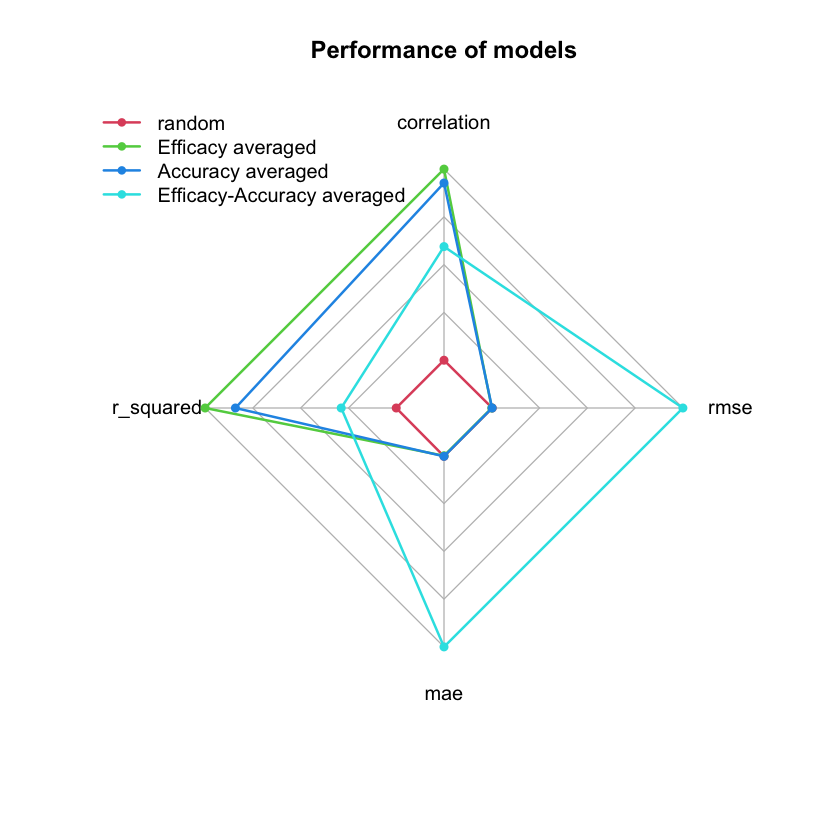

In [698]:
# install.packages("fmsb")
library(fmsb)

# create radar chart with correlation, r_squared, mae and rmse values for each model
radarchart(
    df_for_plot[,2:5], 
    maxmin = FALSE,
    cglty = 1,         # Grid line type
    cglcol = "gray", # Grid line color
    plwd = 2,          # Width for each line
    plty = 1,           # Line type for each line
    pcol = 2:5, # Color for each line
    title = "Performance of models"
)

legend("topleft", 
       legend = df_for_plot[,1], 
       col = 2:5, 
       lty = 1, 
       lwd = 2, 
       bty = "n",
       pch = 20)

In [703]:
# store the radar plot in a pdf file
ggsave("plots/overall_analysis/evaluation_model_radar.pdf", width = 8, height = 8)